In [2]:
import pandas as pd
import numpy as np

In [4]:
import pydataset as py

computers = py.data('Computers')
computers

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


In [15]:
pd.pivot_table(computers, index = 'ram',
               columns = 'screen',
               values = 'price',
               aggfunc = ['min', 'max', 'mean'])

min                     max                         mean  \
screen      14      15      17      14      15      17           14   
ram                                                                   
2        949.0  1088.0  1418.0  2294.0  2090.0  1568.0  1712.566978   
4       1099.0  1199.0  1518.0  3814.0  3914.0  3778.0  1817.672561   
8       1195.0  1299.0  1765.0  4395.0  4104.0  4999.0  2236.170008   
16      1799.0  1823.0  2390.0  4694.0  3849.0  4799.0  2848.310433   
24      2795.0  2223.0  2340.0  3644.0  3790.0  3440.0  3155.200000   
32         NaN  2995.0  3290.0     NaN  3994.0  5399.0          NaN   

                                  
screen           15           17  
ram                               
2       1668.485714  1518.000000  
4       1952.274648  2208.976471  
8       2289.883100  2591.178322  
16      2650.046939  3129.663717  
24      2871.274038  2946.896552  
32      3183.272727  4555.400000

In [26]:
from datetime import datetime
index = pd.date_range('2000/01/01', datetime.now(), freq='D')
index

np.random.seed(1234)
ser = pd.Series(data = np.random.randn(8315), index = index)
ser

2000-01-01    0.471435
2000-01-02   -1.190976
2000-01-03    1.432707
2000-01-04   -0.312652
2000-01-05   -0.720589
                ...   
2022-10-02   -1.180929
2022-10-03   -0.809345
2022-10-04    0.039162
2022-10-05    0.161437
2022-10-06   -0.551424
Freq: D, Length: 8315, dtype: float64

In [28]:
ser['2001-01-01': '2010-12-31'].sum()

52.86295905598889

In [29]:
df = pd.DataFrame({0 : ['아', '야', '어', '여'],
                   1 : ['안녕$하세요', '반a갑a습니다', '오5랜만10000입니다', '다음에:뵈요']})

In [30]:
df

,0,1
0,아,안녕$하세요
1,야,반a갑a습니다
2,어,오5랜만10000입니다
3,여,다음에:뵈요


In [37]:
df.iloc[:,1].str.replace('[^가-힣]', "")

C:\Users\admin\AppData\Local\Temp\ipykernel_10792\1317316485.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iloc[:,1].str.replace('[^가-힣]', "")


0     안녕하세요
1     반갑습니다
2    오랜만입니다
3     다음에뵈요
Name: 1, dtype: object

In [39]:
mpg = py.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [42]:
mpg.pivot_table(index = ['manufacturer', 'model', 'displ'],
               columns = ['cty', 'hwy'],
               aggfunc = {'cty' : ['min', 'max'],
                          'hwy' : ['min', 'max'],
                         'displ' : ['mean']})

cty                                \
                                           max                                 
cty                                         9     11                      12   
hwy                                         12    14    15    16    17    16   
manufacturer model                  displ                                      
audi         a4                     1.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    2.0    NaN   NaN   NaN   NaN   NaN   NaN   
                                    2.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.1    NaN   NaN   NaN   NaN   NaN   NaN   
             a4 quattro             1.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    2.0    NaN   NaN   NaN   NaN   NaN   NaN   
                                    2.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.1    NaN   NaN   NaN   NaN   NaN   NaN   
             a6 quattro             2.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.1    NaN   NaN   NaN   NaN   NaN   NaN   
                                    4.2    NaN   NaN   NaN   NaN   NaN   NaN   
chevrolet    c1500 suburban 2wd     5.3    NaN   NaN  11.0   NaN   NaN   NaN   
                                    5.7    NaN   NaN   NaN   NaN   NaN   NaN   
                                    6.0    NaN   NaN   NaN   NaN   NaN   NaN   
             corvette               5.7    NaN   NaN   NaN   NaN   NaN   NaN   
                                    6.2    NaN   NaN   NaN   NaN   NaN   NaN   
                                    7.0    NaN   NaN   NaN   NaN   NaN   NaN   
             k1500 tahoe 4wd        5.3    NaN  11.0   NaN   NaN   NaN   NaN   
                                    5.7    NaN   NaN  11.0   NaN   NaN   NaN   
                                    6.5    NaN   NaN   NaN   NaN   NaN   NaN   
             malibu                 2.4    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.1    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.5    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.6    NaN   NaN   NaN   NaN   NaN   NaN   
dodge        caravan 2wd            2.4    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.0    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.3    NaN   NaN   NaN   NaN  11.0   NaN   
                                    3.8    NaN   NaN   NaN   NaN   NaN   NaN   
                                    4.0    NaN   NaN   NaN   NaN   NaN   NaN   
             dakota pickup 4wd      3.7    NaN   NaN   NaN   NaN   NaN   NaN   
                                    3.9    NaN   NaN   NaN   NaN   NaN   NaN   
                                    4.7    9.0   NaN   NaN   NaN   NaN   NaN   
                                    5.2    NaN   NaN  11.0   NaN  11.0   NaN   
             durango 4wd            3.9    NaN   NaN   NaN   NaN   NaN   NaN   
                                    4.7    9.0   NaN   NaN   NaN   NaN   NaN   
                                    5.2    NaN   NaN   NaN  11.0   NaN   NaN   
                                    5.7    NaN   NaN   NaN   NaN   NaN   NaN   
                                    5.9    NaN   NaN  11.0   NaN   NaN   NaN   
             ram 1500 pickup 4wd    4.7    9.0   NaN   NaN   NaN   NaN  12.0   
                                    5.2    NaN   NaN  11.0  11.0   NaN   NaN   
                                    5.7    NaN   NaN   NaN   NaN   NaN   NaN   
                                    5.9    NaN   NaN  11.0   NaN   NaN   NaN   
ford         expedition 2wd         4.6    NaN   NaN   NaN   NaN  11.0   NaN   
                                    5.4    NaN   NaN   NaN   NaN  11.0   NaN   
             explorer 4wd           4.0    NaN   NaN   NaN   NaN   NaN   NaN   
                                    4.6    

In [43]:
mpg.pivot_table(index = ['manufacturer', 'model'],
                values = ['cty', 'hwy', 'displ'], 
                aggfunc = {'cty' : ['max', 'min'],
                          'hwy' : ['max', 'min'],
                          'displ' : 'mean'})

cty         displ hwy    
                                    max min      mean max min
manufacturer model                                           
audi         a4                      21  16  2.328571  31  26
             a4 quattro              20  15  2.425000  28  25
             a6 quattro              17  15  3.366667  25  23
chevrolet    c1500 suburban 2wd      14  11  5.520000  20  15
             corvette                16  15  6.160000  26  23
             k1500 tahoe 4wd         14  11  5.700000  19  14
             malibu                  22  17  3.000000  30  26
dodge        caravan 2wd             18  11  3.390909  24  17
             dakota pickup 4wd       15   9  4.411111  19  12
             durango 4wd             13   9  4.971429  18  12
             ram 1500 pickup 4wd     13   9  5.020000  17  12
ford         expedition 2wd          12  11  5.133333  18  17
             explorer 4wd            15  13  4.266667  19  17
             f150 pickup 4wd         14  11  4.714286  17  15
             mustang                 18  14  4.377778  26  20
honda        civic                   28  21  1.711111  36  29
hyundai      sonata                  21  18  2.557143  31  26
             tiburon                 20  16  2.300000  29  24
jeep         grand cherokee 4wd      17   9  4.575000  22  12
land rover   range rover             12  11  4.300000  18  15
lincoln      navigator 2wd           12  11  5.400000  18  16
mercury      mountaineer 4wd         14  13  4.400000  19  17
nissan       altima                  23  19  2.800000  32  26
             maxima                  19  18  3.166667  26  25
             pathfinder 4wd          15  12  4.050000  20  17
pontiac      grand prix              18  16  3.960000  28  25
subaru       forester awd            20  18  2.500000  27  23
             impreza awd             21  19  2.425000  27  25
toyota       4runner 4wd             16  14  3.483333  20  17
             camry                   21  18  2.671429  31  26
             camry solara            22  18  2.642857  31  26
             corolla                 28  24  1.800000  37  30
             land cruiser wagon 4wd  13  11  5.200000  18  15
             toyota tacoma 4wd       17  15  3.271429  22  17
volkswagen   gti                     22  17  2.160000  29  24
             jetta                   33  16  2.277778  44  23
             new beetle              35  19  2.133333  44  26
             passat                  21  16  2.400000  29  26

In [45]:
names1880 = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [48]:
# 성별 출생수를 모두 합한 값을 해당 연도의 전체 출생수라고 가정
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [52]:
pwd

'C:\\Users\\admin'

In [92]:
# 파일 합치기
years = range(1880, 2011)

pieces = []
columns = ['name', 'gender', 'births']
df = pd.DataFrame()

for year in years :
    # path = (f"./datasets_baby_names/datasets/babynames/yob{year}.txt")
    path = "./datasets_baby_names/datasets/babynames/yob%d.txt"%year
    # path = ("./datasets_baby_names/datasets/babynames/yob{}.txt").format(year)
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    # names = pd.concat([df, frame], ignore_index=True)
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)

In [93]:
names

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [94]:
# 연도와 성별에 따른 데이터 보기
total_births = names.pivot_table('births', index = 'year',
                                columns = 'gender', aggfunc = sum)
total_births

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


<AxesSubplot:title={'center':'Total'}, xlabel='year'>

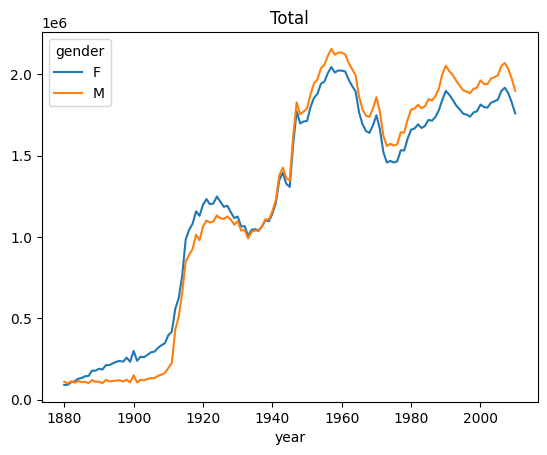

In [95]:
total_births.plot(title = 'Total')

<AxesSubplot:xlabel='year', ylabel='births'>

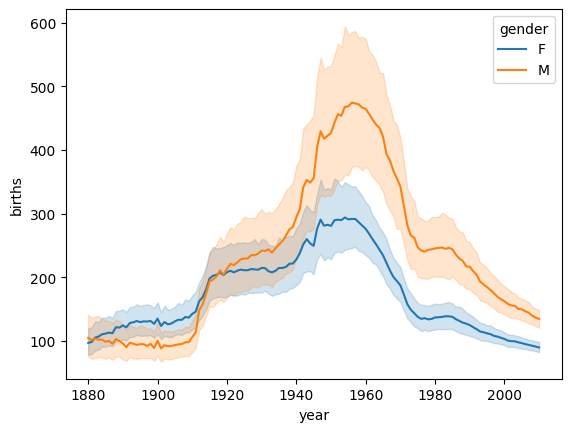

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=names, x = 'year', y = 'births' ,hue = "gender")

In [ ]:
### 년도별 비교
1. 전반적으로 아시아 이동객이 많다. 엄청 많다 <br>
코로나 시기(2020) 수가 급감 <br>
메르스 시기(2015-2016) 감소 <br>
아시아 이동객 2017년도에 감소가 보이는데 사드배치 영항으로 보임

In [ ]:
### 달 별 상세 비교
색이 밝을 수록 외래객의 수가 적은것
1. 모든 대륙에서 코로나 이후 이동객이 급감하였다.
2. 이명박 대통령 시기부터 점차적으로 외래객의 수가 증가하는 경향을 보인다.
3. 2015 - 2016년도 메르스로 인하여 외래객의 이동이 급격히 적어진 것을 확인할 수 있으나 점차 회복한 것을 확인할 수 있다.